# Итоговая задача

Общее описание: необходимо написать  программу, которая принимает fastq файл и на выходе даёт набор базовых статистик и графиков. Каждый тип статистики и графиков выполняется в своем блоке, описанном ниже:

Документация:
- fastq файл (https://ru.wikipedia.org/wiki/FASTQ)
- phred (https://en.wikipedia.org/wiki/Phred_quality_score)
- ASCII (https://ru.wikipedia.org/wiki/ASCII)


## Чтение файла

Документ FASTQ обычно использует четыре строки на каждую последовательность.

- Строка 1 начинается с символа «@», за ней следует идентификатор последовательности и необязательное описание (например, строка заголовка FASTA).
- Строка 2 — это необработанные символы последовательности.
- Строка 3 начинается с символа «+» и является необязательной, после чего снова следует тот же идентификатор последовательности (и любое описание).
- Строка 4 кодирует значения качества для последовательности в строке 2 и должна содержать то же количество символов, что и строка последовательности.

Пример строк файла:  
@HWI-ST1113:242:H0Y72ADXX:1:1101:1329:2072 1:Y:0:AGTCAA  
TCACTTNNCTTGCCATATTCCACGTCCTACAGTGGA  
\+  
<<<??@##2<=@?@????@@@?@?@??@???@????  
@HWI-ST1113:242:H0Y72ADXX:1:1101:1430:2115 1:N:0:AGTCAA  
TAGAAAAATGATGATATCACTGAAAAACGTGAAAAA  
\+  
BCCFFFFFHHHHHJGIJJIJJJJJJJJJJIIJJJJI  


В документе множество таких последовательностей, необходимо каждую из них получить по отдельности, а не создавать общую длинную строку.

## Получение базовой статистики

- имя файла
- количество последовательностей в fastq файле
- самая часто встречающая длина последовательности
- средний GC состав в файле
- средний нуклеотидный состав

## Работа с адаптерными последовательностями

- спросить пользователя размер мнимального вхождения адаптерной последовательности. Если вводимое пользователем число меньше 3, то выдавать сообщение, что этослишком короткое вхождение и уставливать все равно минимальное 3.
- после рассчета базовой статистики, предложите пользователю удалить алаптеры. Если ответ положительный, то необходимо найти адаптерные последовательности (они будут вам даны отдельным файлом) с учетом того, что адаптер может быть представлен не полностью
- посчитать количество удаленных адаптерных последовательностей
- сохраните все изменненные последовательности в новый fastq файл

## Графическая визуализация

необходимо построить следующие графики:

- добавить возмонжость выбора качества сохраняемых графиков
- Распределение длин последовательностей
- общий (единый, не subplot) график распределение GC состава последовательностей
- график частоты нуклеотидов в каждой позиции в последовательностях
- Рассчитать для каждой последовательности средний phred score и визуализировать распределения этих значений на графике
- построить график среднего значения Phred-score для позиции каждого нуклеотда в последовательностях

## Вывод статистики

- создать таблицу DataFrame со всей статистикой
- если производилось удаление адаптерных последовательностей, то добавить их в статистику
- сохранить эту таблицу также в отдельный файл
- сохранить графики по отдельности
- добавить возможность создания subplots из всех графиков


# Что такое Phred score и как его считать:
Phred значение (Phred-score или Q-score) описвает качество идентификации нуклеотида секвенатором. В FASTQ файлах Phred-score кодируются ASCII символами. Благодаря этому каждое значение Phred score кодируется одним симоволом, соответствующим одному нуклеотиду последовательности. В рамках домашнего задания исопльзуется Phred+33. Для получения численого предствления Phred-score для нуклеотида необходимо получить порядковый номер символа в кодировке ASCII при помощи метода **ord()**. Например, **ord('&')** вернёт значение 38. Для получение Q-score необходимо вычесть из полученного значения 33. Таким образом, символ & соответствует Phred-score = 3.




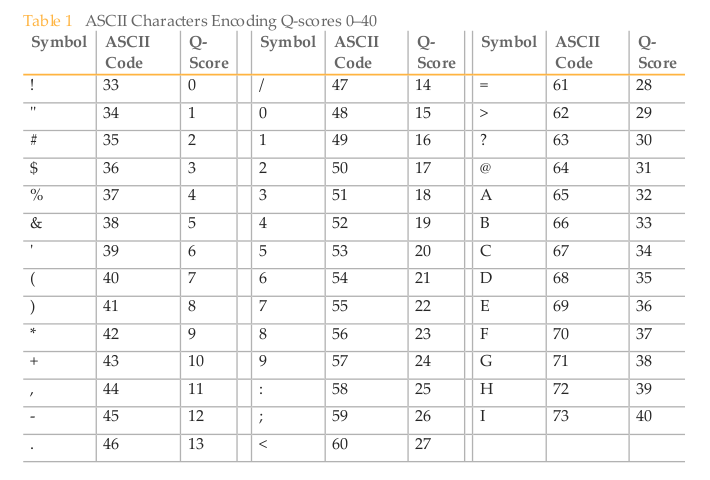

Пример графика длины последовательностей

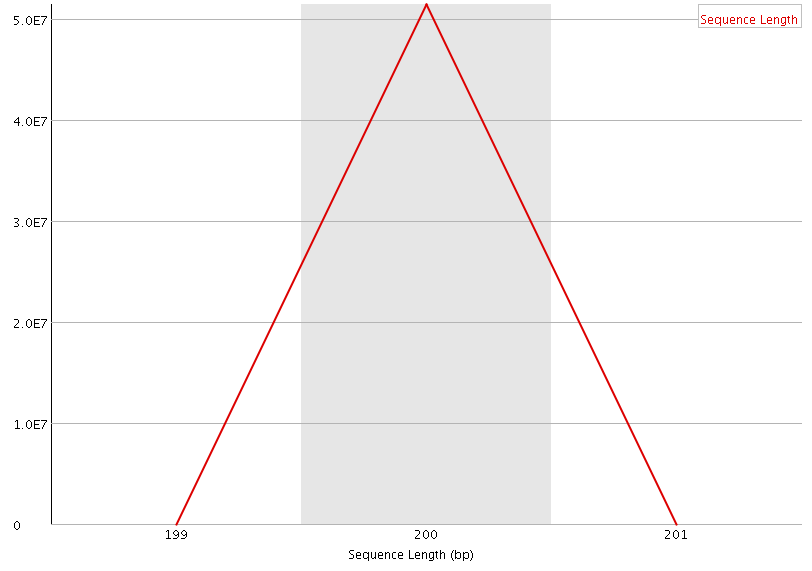

Пример графика частоты нуклеотидов
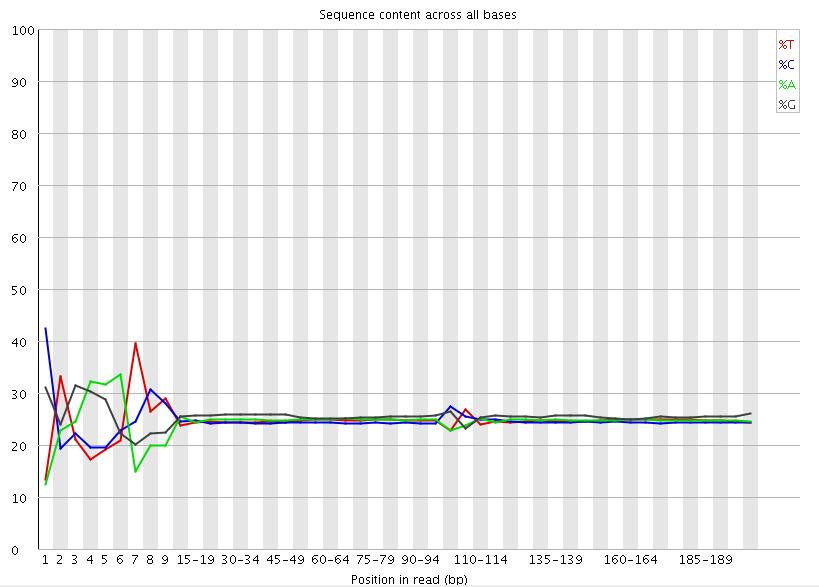

Пример графика phred score для последовательностей

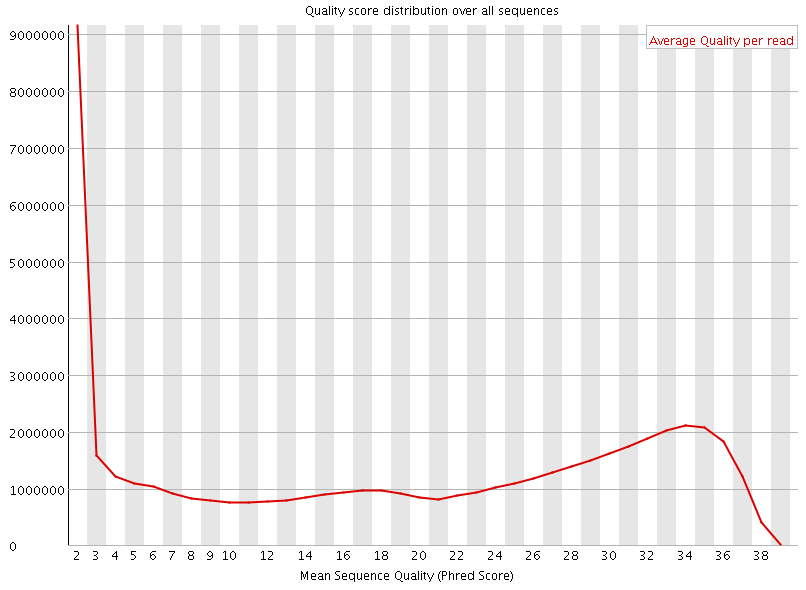

Пример графика phred score для каждого нуклеотида. Вам не надо делать box-plot, как в примере, необходимо просто построить график среднего значения (синяя линия на графике)

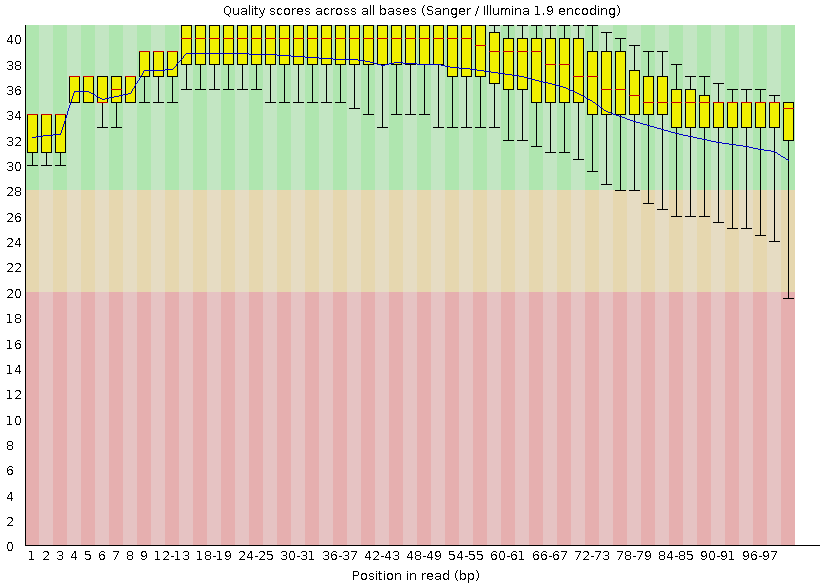

File name: READS055722.student_11.fastq
Number of sequences in fastq file: 4279
Most frequent length of sequence: 76
Average GC - composition of sequences: 39.68985621333076
Average nucleotide composition of sequences: {'A': 0.3003622341668614, 'T': 0.30271767874933886, 'G': 0.19420425333021735, 'C': 0.20269430880308975}


Enter the minimum length of insertion of the adapter sequence:  3
Do you want to remove the adapters? (yes/no):  yes


Number of deleted adapters: 323
New fastq file saved as: c:\projects\python-for-beginners\homework tasks\..\lections\files_and_images\final_task\READS055722.student_11_changed.fastq
File name: READS055722.student_11_changed.fastq
Number of sequences in fastq file: 4279
Most frequent length of sequence: 76
Average GC - composition of sequences: 39.754375781269545
Average nucleotide composition of sequences: {'A': 0.3011569939898433, 'T': 0.3012967650758646, 'G': 0.19484399993787951, 'C': 0.20268049882747588}


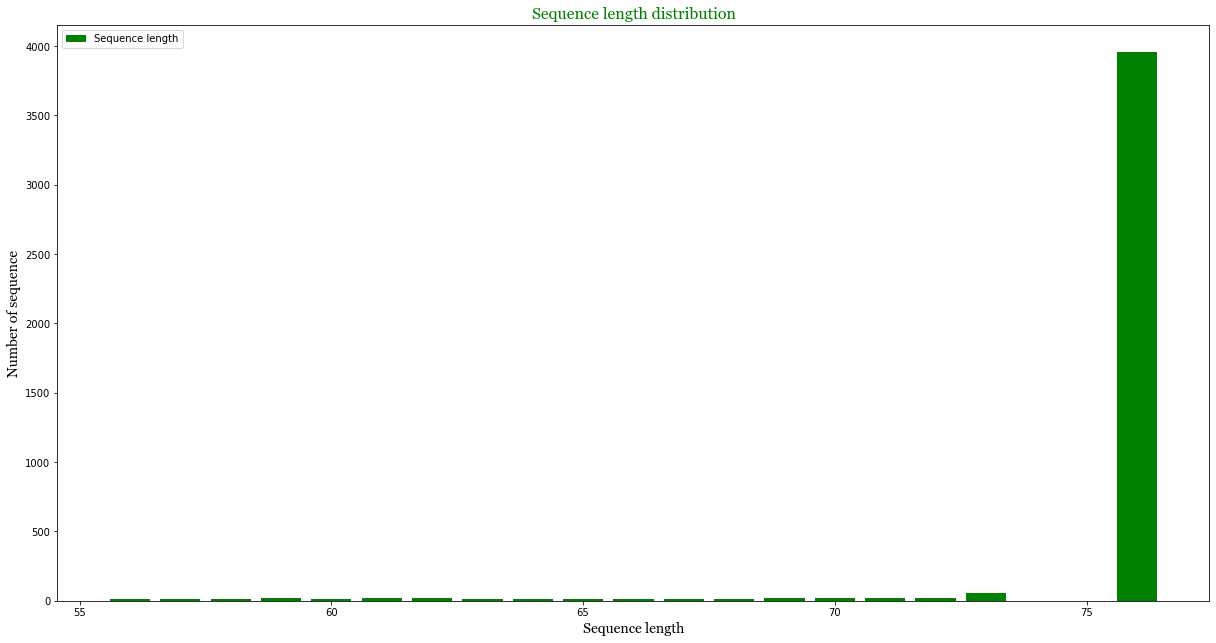

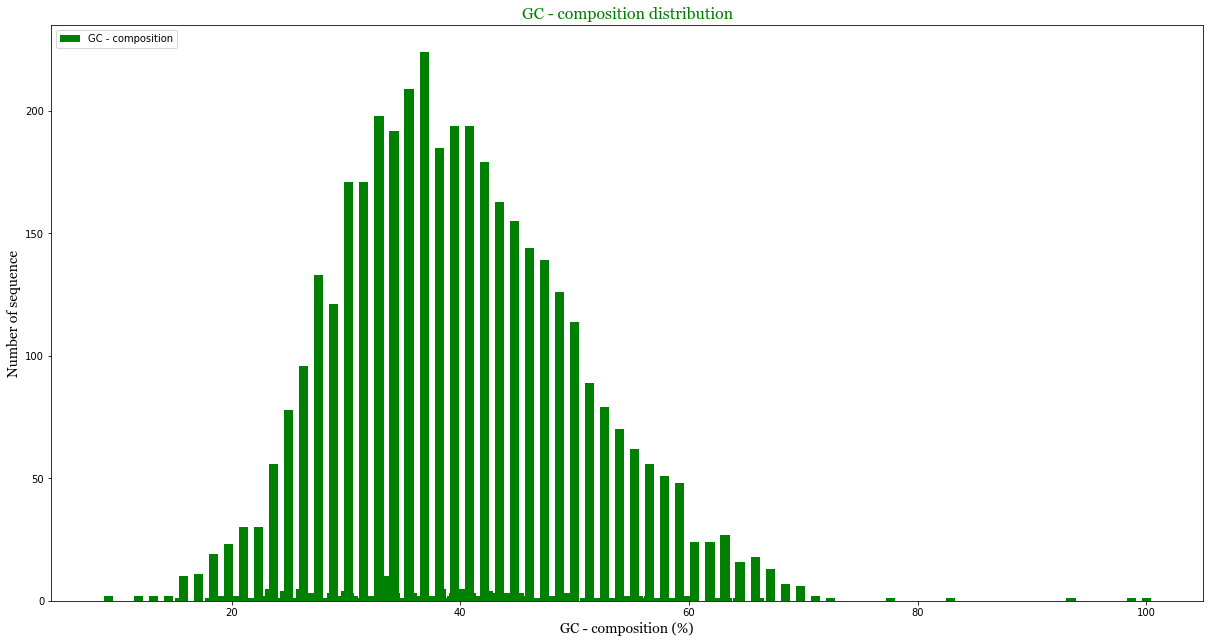

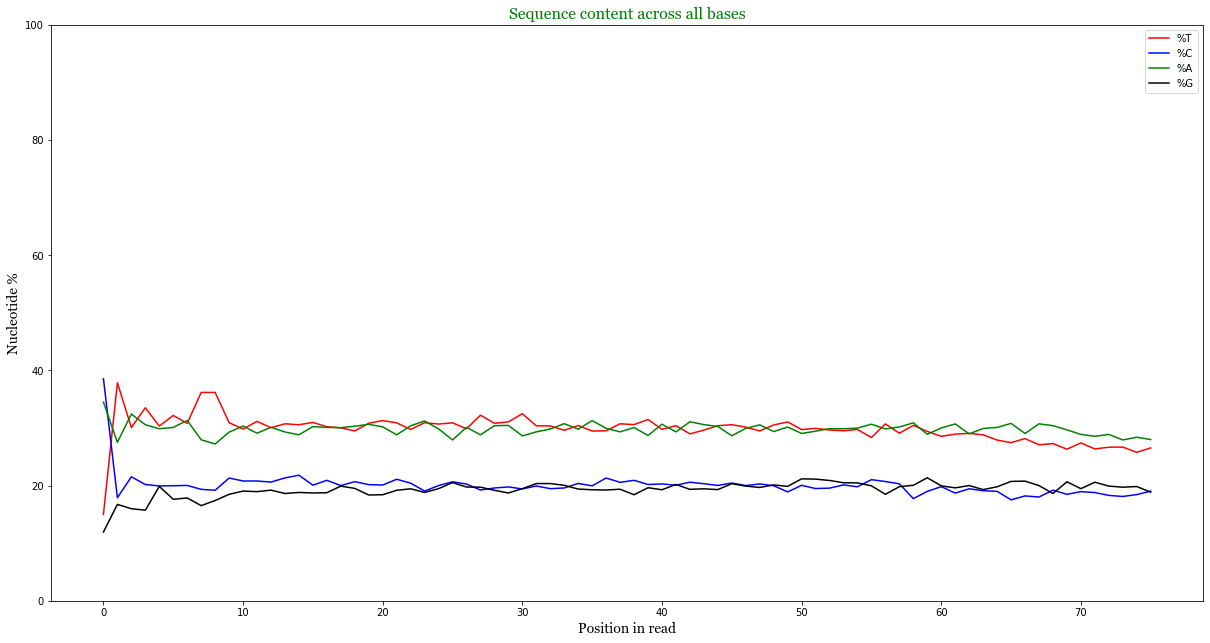

In [26]:
# место для ответа

# Parses fastq file
def read_fastq_file(inp_fastq_file):
    name, seq, optional, quality = '', '', '', ''
    for line in inp_fastq_file:
        line = line.rstrip()
        if line.startswith("@"):
            if name:
                yield(name, seq, optional, quality)
            name, seq, optional, quality = line, '', '', ''
        elif line.startswith("+"):
            optional = line
        else: 
            if optional:
                quality = line
            else: 
                seq = line
    if name: 
        yield(name, seq, optional, quality)
        
#moda - самое популярное (moda(len...)
#с каждой последовательностью работаем по отдельности
#средний gc состав - делить на число последовательностей

# Finds the most frequent element in list
def most_frequent(some_list):
    frequency = 0
    most_freq_elem = some_list[0]
    for elem in some_list:
        if some_list.count(elem) > frequency:
            frequency = some_list.count(elem)
            most_freq_elem = elem
    return most_freq_elem


# Defines type of sequence (DNA/RNA)
def nucl_seq_type(nucl_seq):
    par = True
    if 'U' in list(nucl_seq): 
        par = False
    return par

# Calculates total length of sequences
def total_length_of_seq(list_of_seq):
    total_length = 0
    for seq in list_of_seq:
        total_length += len(seq)
    return total_length
        
# Calculates nucleotide composition of sequence
def nucl_seq_composition(nucl_seq):
    dict_of_nucl = {}
    if nucl_seq_type(nucl_seq):
        for nucl in list('ATGC'):
            dict_of_nucl.update([(nucl, list(nucl_seq).count(nucl))])
    else:
        for nucl in list('AUGC'):
            dict_of_nucl.update([(nucl, list(nucl_seq).count(nucl))])
    return dict_of_nucl

# Calculates average nucleotide composition of sequences
def average_nucl_composition(list_of_seq):
    dict_of_nucl = {}
    total_length = total_length_of_seq(list_of_seq)
    if nucl_seq_type(list_of_seq[0]):
        for nucl in list('ATGC'):
            nucl_count = 0
            for seq in list_of_seq:
                nucl_count += nucl_seq_composition(seq)[nucl]
            dict_of_nucl.update([(nucl, nucl_count / total_length)])
    else:
         for nucl in list('AUGC'):
            nucl_count = 0
            for seq in list_of_seq:
                nucl_count += nucl_seq_composition(seq)[nucl]
            dict_of_nucl.update([(nucl, nucl_count / total_length)])
    return dict_of_nucl

# Calculates GC - composition (%) of sequence
def nucl_seq_gc(nucl_seq):
    dict_of_nucl = nucl_seq_composition(nucl_seq)
    gc_composition = ((dict_of_nucl['G'] + dict_of_nucl['C']) / len(nucl_seq)) * 100
    return gc_composition

# Finds average GC - composition of sequences
def average_gc_composition(list_of_seq):
    return sum([nucl_seq_gc(seq) for seq in list_of_seq]) / len(list_of_seq)

# Shows basic statistic of sequences in fastq file
def fastq_file_basic_statistic(path_to_inp_fastq_file):
    with open(path_to_inp_fastq_file, 'r') as inp_fastq_file:
        number_of_seq = 0
        #list_of_seq_length = []
        list_of_seq = []
        for name, seq, optional, quality in read_fastq_file(inp_fastq_file):
            #print(name, seq, optional, quality, sep = '\n', end = '\n\n')
            number_of_seq += 1
            #list_of_seq_length.append(len(seq))
            list_of_seq.append(seq)
        list_of_seq_length = [len(seq) for seq in list_of_seq]
    print(f'File name: {os.path.basename(path_to_inp_fastq_file)}')
    print(f'Number of sequences in fastq file: {number_of_seq}')
    
    print(f'Most frequent length of sequence: {most_frequent(list_of_seq_length)}')
    print(f'Average GC - composition of sequences: {average_gc_composition(list_of_seq)}')
    print(f'Average nucleotide composition of sequences: {average_nucl_composition(list_of_seq)}') 

# Finds the insertion of the first_seq in the second_seq with a length of overlap area >= min_insertion
# Returnes length of the overlap area
def overlap_seq(first_seq, second_seq, min_insertion):
    number_of_spaces = -1
    for i in range(0, len(first_seq)):
        if (first_seq[i:] in second_seq) and (second_seq.find(first_seq[i:]) == 0) and (len(first_seq[i:]) >= min_insertion):
            number_of_spaces = i
            sep_string = ' ' * number_of_spaces
            #print(first_seq)
            #print(f'{sep_string}{second_seq}')
            break
    if number_of_spaces == -1:
        #print('No overlap area')
        overlap_length = 0
    else: 
        overlap_length = len(first_seq[i:])
    return(overlap_length)

# Finds the insertions of the adapter from path_to_adapters_file in the sequences from path_to_inp_fastq_file with a length of overlap area >= min_insertion
# Asks for user permission to remove found insertions
# If permission is given, then saves fastq file with changes in path_to_out_fastq_file
def work_with_adapters(path_to_inp_fastq_file, path_to_adapters_file, path_to_out_fastq_file):
    with open(path_to_adapters_file, 'r') as inp_adapters_file:
        adapter_seq = inp_adapters_file.read().strip()
    #print(f'Adapter sequence: {adapter_seq}')
    adapter_min_insertion = int(input('Enter the minimum length of insertion of the adapter sequence: '))
    if adapter_min_insertion < 3:
        adapter_min_insertion = 3
        print('The minimum length of insertion cannot be less than 3')
        print('The minimum length of inserion is set to 3')
    del_par = str(input('Do you want to remove the adapters? (yes/no): '))
    if del_par == 'yes':
        with open(path_to_inp_fastq_file, 'r') as inp_fastq_file:
            with open(path_to_out_fastq_file, 'w') as out_fastq_file:
                list_of_seq = []
                number_of_deleted_adapters = 0
                for name, seq, optional, quality in read_fastq_file(inp_fastq_file):
                    overlap_length = overlap_seq(adapter_seq, seq, adapter_min_insertion)
                    if overlap_length > 0:
                        seq = seq[overlap_length: ]
                        #print(seq)
                        number_of_deleted_adapters += 1
                    out_fastq_file.write(name + '\n')
                    out_fastq_file.write(seq + '\n')
                    out_fastq_file.write(optional + '\n')
                    out_fastq_file.write(quality + '\n')
                print(f'Number of deleted adapters: {number_of_deleted_adapters}')
                print(f'New fastq file saved as: {path_to_out_fastq_file}')
    else:
        print('No changes required')
    return del_par

    
    
import re
import os
path_to_code = os.getcwd()
path_to_inp_fastq_file = os.path.join(path_to_code, os.pardir, 'lections', 'files_and_images', 'final_task', 'READS055722.student_11.fastq')
fastq_file_basic_statistic(path_to_inp_fastq_file)
path_to_adapters_file = os.path.join(path_to_code, os.pardir, 'lections', 'files_and_images', 'final_task', 'adapters.txt')
path_to_out_fastq_file = os.path.join(path_to_code, os.pardir, 'lections', 'files_and_images', 'final_task', 'READS055722.student_11_changed.fastq')

work_with_adapters(path_to_inp_fastq_file, path_to_adapters_file, path_to_out_fastq_file)
fastq_file_basic_statistic(path_to_out_fastq_file)

# work with graph
import matplotlib.pyplot as plt
import seaborn as sns

dpi = 600 #quality

font1 = {'family': 'Georgia', # это шрифт
        'color':  'green', # Цвет шрифта
        'weight': 'normal', # тип шрифта (жирный, полужирный и т.п.)
        'size': 16, # Размер Шрифта
        }
font2 = {'family': 'Georgia', # это шрифт
        'color':  'black', # Цвет шрифта
        'weight': 'normal', # тип шрифта (жирный, полужирный и т.п.)
        'size': 14, # Размер Шрифта
        }

# plt.figure(figsize=(16, 8))
# plt.bar(x, y, color='g')
# plt.title('Sequence length distribution', fontdict = font1)
# plt.xlabel('Sequence length', fontdict = font2)
# plt.ylabel('Number of sequence', fontdict = font2)
# plt.legend(loc = 'best')
# plt.show()


# Sequence length distribution
list_of_length = []
with open(path_to_out_fastq_file, 'r') as changed_fastq_file:
    for name, seq, optional, quality in read_fastq_file(changed_fastq_file):
        list_of_length.append(len(seq))
#print(list_of_length)
x = list(set(list_of_length))
y = []
for elem in x:
    y.append(list_of_length.count(elem))
#print(x)
#print(y)

fig = plt.figure(figsize=(16, 8))
axes = fig.add_axes([1,1,1,1])
axes.bar(x, y, color='g')
axes.set_title('Sequence length distribution', fontdict = font1)
axes.set_xlabel('Sequence length', fontdict = font2)
axes.set_ylabel('Number of sequence', fontdict = font2)
axes.legend(['Sequence length'], loc = 2)
plt.show()
#save graph


# GC - composition
list_of_gc = []
with open(path_to_out_fastq_file, 'r') as changed_fastq_file:
    for name, seq, optional, quality in read_fastq_file(changed_fastq_file):
        list_of_gc.append(nucl_seq_gc(seq))
#print(list_of_gc)
x = list(set(list_of_gc))
x.sort()
y = []
for elem in x:
    y.append(list_of_gc.count(elem))
#print(x)
#print(y)

fig = plt.figure(figsize=(16, 8))
axes = fig.add_axes([1,1,1,1])
#axes.plot(x, y, color='g')
axes.bar(x, y, color='g')
axes.set_title('GC - composition distribution', fontdict = font1)
axes.set_xlabel('GC - composition (%)', fontdict = font2)
axes.set_ylabel('Number of sequence', fontdict = font2)
axes.legend(['GC - composition'], loc = 2)
plt.show()
#save graph


# Nucleotide frequency
list_of_freq_A = []
list_of_freq_T = []
list_of_freq_G = []
list_of_freq_C = []
with open(path_to_out_fastq_file, 'r') as changed_fastq_file:
    number_of_seq = 0
    list_of_seq = []
    for name, seq, optional, quality in read_fastq_file(changed_fastq_file):
        list_of_seq.append(seq)
        number_of_seq += 1
        
i_pos_of_seq = []
for i in range(0, max(list_of_length)):
    #i_pos_of_seq = [seq[i] if i < 5 else seq[o] for seq in list_of_seq]
    i_pos_of_seq = [seq[i] if (len(seq) > i) else 'None' for seq in list_of_seq]
    list_of_freq_A.append(i_pos_of_seq.count('A') / number_of_seq * 100)
    list_of_freq_T.append(i_pos_of_seq.count('T') / number_of_seq * 100)
    list_of_freq_G.append(i_pos_of_seq.count('G') / number_of_seq * 100)
    list_of_freq_C.append(i_pos_of_seq.count('C') / number_of_seq * 100)
#print(list_of_gc)
yA = list_of_freq_A
yT = list_of_freq_T
yG = list_of_freq_G
yC = list_of_freq_C
x = [i for i in range(0, max(list_of_length)) ]
#print(x)
#print(y)

fig = plt.figure(figsize=(16, 8))
axes = fig.add_axes([1,1,1,1])
axes.set_ylim([0, 100])
#axes.plot(x, y, color='g')
axes.plot(x, yT, color='r')
axes.plot(x, yC, color='b')
axes.plot(x, yA, color='g')
axes.plot(x, yG, color='black')
axes.set_title('Sequence content across all bases', fontdict = font1)
axes.set_xlabel('Position in read', fontdict = font2)
axes.set_ylabel('Nucleotide %', fontdict = font2)
axes.legend(['%T', '%C', '%A', '%G'], loc = 1)
plt.show()
#save graph
